# Homework 2 - Chapter 14

- Due Date: ?? no later than 11:59 p.m.
- Partner Information: You must complete this assignment individually.
- Submission Instructions: Upload your solution, entitled **YourFirstName-YourLastName-Homework2.ipynb** to the 
BrightSpace Homework 2 Dropbox.
- Deadline Reminder: Once the submission deadline passes, BrightSpace will no longer accept your submission and you will no longer be able to earn credit. 
Thus, if you are not able to fully complete the assignment, submit whatever you have before the deadline so that partial credit can be earned.

## Starting Code

In [97]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
%matplotlib inline

Download the file [top_10_spotify_2025.csv]() into the same directory as this Jupyter notebook.

In [98]:
spotify = Table().read_table('top_10_spotify_2025.csv')
spotify

name                           | artists                   | daily_rank | country | danceability
What I Want (feat. Tate McRae) | Morgan Wallen, Tate McRae | 1          | US      | 0.657
Just In Case                   | Morgan Wallen             | 2          | US      | 0.649
Ordinary                       | Alex Warren               | 3          | US      | 0.368
I Got Better                   | Morgan Wallen             | 4          | US      | 0.598
undressed                      | sombr                     | 5          | US      | 0.642
back to friends                | sombr                     | 6          | US      | 0.436
luther (with sza)              | Kendrick Lamar, SZA       | 7          | US      | 0.707
NOKIA                          | Drake                     | 8          | US      | 0.537
I'm The Problem                | Morgan Wallen             | 9          | US      | 0.549
BIRDS OF A FEATHER             | Billie Eilish             | 10         | US      | 0.747
... (2771 rows omitted)

*Danceability* is a metric Spotify has developed that determines how easy it is to dance to a certain song. It is recorded on a scale of 0 - 1, with 0 being the least "danceable", and 1 being the most danceable. The selected dataset contains the top 10 songs in the United States and France everyday from the beginning of 2025 until the date the assignment was created.

We will use the *danceability* metric to analyze how means change when sampling, and introduce one of the most important ideas in statistics: The **Central Limit Theorem**.

## Question 1a - 1 Point

One of the first steps in many statistical analyses is to visualize the data. This helps us get a basic idea on some of the measures we will use in an experiment. Using a Histogram, plot the *danceability* column of the **spotify** table. The histogram should have 20 bins ranging from 0 to 1. Plot a vertical red line at the mean of the data on the x-axis, and extend it from 0 to 3 on the y-axis. (Hint: check the [plots.vline()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html) documentation)

In [99]:
# Place Answer Here

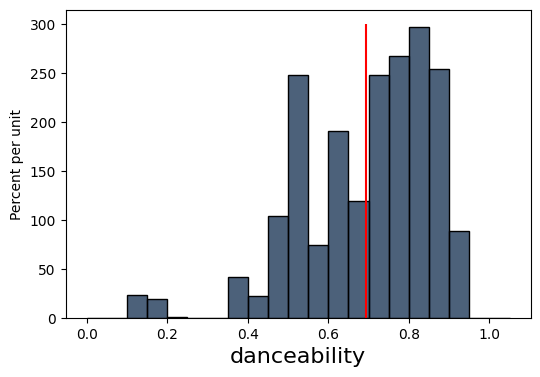

In [100]:
# Plots the Histogram of the data with 20 bins, then plots the mean with a vertical line
spotify.hist('danceability', bins=np.arange(0,1.1, .05))
plots.vlines(np.mean(spotify['danceability']), 0, 3, colors='Red');

## Question 1b - 1 Point

What direction is the histogram skewed? While code is not necessary for this question, you **may** use the following code block if desired. Answer in the space provided.

In [101]:
# Place Code Here

**Answer -**

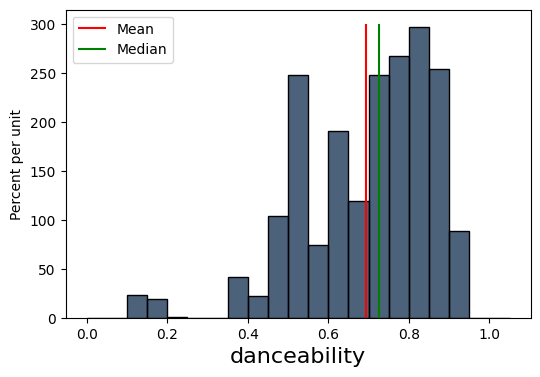

In [102]:
# NOTE: This code block is optional. It should not be graded.

# Plots the histogram with mean and median, which could be used to determine skew following the definition in the book
spotify.hist('danceability', bins=np.arange(0,1.1, .05))
plots.vlines(np.mean(spotify['danceability']), 0, 3, colors='Red', label='Mean')
plots.vlines(np.median(spotify['danceability']), 0, 3, colors='Green', label='Median')
plots.legend();

**Sample Answer -** Left

## Question 2a - 2 Points

The "informal statement" in section 14.2.4 of the book says "In all numerical data sets, the bulk of the entries are within the range *average 
 $\pm$ a few SDs*". Finding this proportion helps us view the spread of the data.
 
Create a function that calculates the proportion of data that falls within **2 Standard Deviations** of the mean. Print out this proportion in the following format: *74.68% of the data is within 2 standard deviations of the mean.* (Note: the number will be different in your answer.)

In [103]:
# Place Answer Here

In [104]:
def prop_in_bounds(col):
    '''Calculates the proportion of the data within 2 SDs'''
    mean = np.mean(col)
    sd = np.std(col)
    # Takes the column length, necessary to calculate the proportion
    col_len = len(col)

    # Calculates the upper and lower bounds
    lower_bound = mean - (2 * sd)
    upper_bound = mean + (2 * sd)

    number = 0
    # Counts the number of datapoints within the bounds
    for i in col:
        if lower_bound <= i <= upper_bound:
            number += 1

    # Returns the proportion
    return number/col_len

# Calculates the proportion and prints in the desired format
chebychevs_2 = prop_in_bounds(spotify['danceability'])
print(f'{round(chebychevs_2*100, 2)}% of the data is within 2 standard deviations of the mean.')

95.76% of the data is within 2 standard deviations of the mean.


## Question 2b - 1 Point

Since this distribution is not normal, we cannot use any known proportions for data that is similar to a bell curve. However, we can use **Chebychev's bounds**. Does the proportion from question 2a make sense when using Chebychev's bounds?

**Answer -**

**Sample Answer -** Yes, because Chebychev's bounds provide a lower bound for the proportion. At least 75% of the data should fall within 2 Standard Deviations, and we have ~95% of the data within 2 Standard Deviations.   

## Question 3 - 1 Point

Converting data to *Standard Units* is a helpful technique while performing data analysis. This technique is also known as **Z-Score Normalizing**. Add a column containing the danceability scores in standard unites called *norm_dance* to the **spotify** table. Then, display a histogram of the new column.

In [105]:
# Place Answer Here

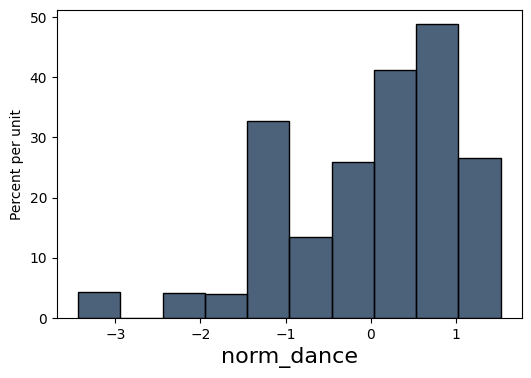

In [106]:
def normalize(col):
    '''z-score normalizes the data'''
    return (col - np.mean(col))/np.std(col)

# Adds the column to the table and displays the histogram
spotify = spotify.with_column('norm_dance', normalize(spotify['danceability']))
spotify.hist('norm_dance')

## Question 4 - 1 Point

Print the mean and the standard deviation of the *norm_dance* column of the **spotify** table in the following format: *The (mean/standard deviation) is: 1.7*. (Note: the number will change)

In [107]:
# Place Answer Here

In [108]:
print(f'The mean is: {round(np.mean(spotify['norm_dance']), 2)}')
print(f'The standard deviation is: {round(np.std(spotify['norm_dance']), 2)}')

The mean is: -0.0
The standard deviation is: 1.0


## Question 5a - 2 Points

Now that we have standardized data, we can attempt to understand the Central Limit Theorem. Create a function called **simulate** that takes a sample of variable size 500 times, takes the mean *norm_dance* of the sample, then adds it it to an array. Once the array has 500 means in it, return the array. 

Use this function to create two tables: one with a sample size of 5 called *means_5*, and one with a sample size of 250 called *means_250*. Each table should have 500 rows. Display a histogram of both tables.

In [109]:
# Place Answer Here

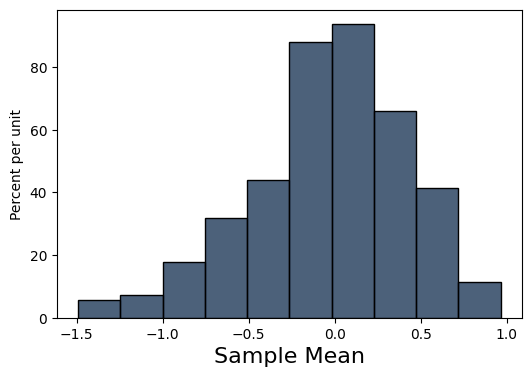

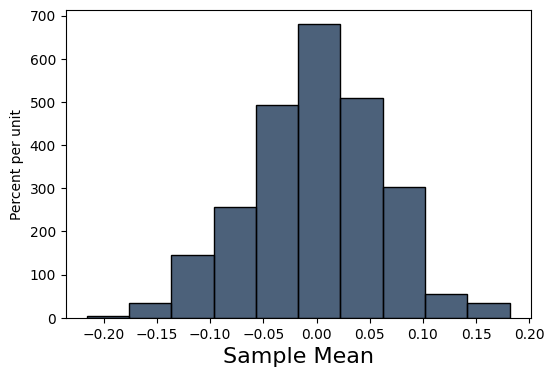

In [110]:
def simulate(col, reps):
    '''Simulates 1000 means of a set sample size'''
    sample_means = make_array()

    # Gets 1000 means, adds to the array
    for _ in range(500):
        song_sample = spotify.sample(reps)
        sample_means = np.append(sample_means, np.mean(song_sample[col]))

    return sample_means

# Creates two tables, one with a sample size of 5 and one with sample size of 100
means_5 = Table().with_column('Sample Mean', simulate('norm_dance', 5))
means_250 = Table().with_column('Sample Mean', simulate('norm_dance', 250))

# Displays the histograms of the means
means_5.hist('Sample Mean')
means_250.hist('Sample Mean')

## Question 5b - 1 Point

Print the means the **norm_dance** column of the *spotify* table, and the means of the *means_5* and *means_250* tables in the following format: *The mean of (Replace with table name) is: -4.5* (Note: The number will change). Round these values to two decimal places. What table has a mean closest to the *spotify* table? Does this make sense? Answer in the space provided.

In [111]:
# Place Code Here

**Answer -**

In [112]:
# Prints the means of all the tables to two decimal places
print(f'The mean of the spotify table is: {round(np.mean(spotify['norm_dance']), 2)}')
print(f'The mean of the means_5 table is: {round(np.mean(means_5['Sample Mean']), 2)}')
print(f'The mean of the means_250 table is: {round(np.mean(means_250['Sample Mean']), 2)}')

The mean of the spotify table is: -0.0
The mean of the means_5 table is: -0.03
The mean of the means_250 table is: -0.0


**Sample Answer-** The table with a sample size of 250 has a mean that is closest to the spotify table. This makes sense as the Central Limit Theorem states that larger samples will be closer to the population mean.

## Bonus Question

A two-sample t-test is a way of comparing two groups, and seeing if their means are "substantially" different. This is may sound similar to A/B testing explored in chapter 12 of the text, but while A/B testing checks if two samples come from the same underlying distribution, t-tests examine whether one group's mean is different than the other. In our case, we can use this test to see if the *danceability* of one countries top songs is higher or lower than another country.

T-tests have a set of assumptions that need to be met in order for them to work. These assumptions are the observations are **Independent**, the samples have **Equal Variance**, and the distributions of each sample are **Normal**.

## Bonus Question (a) - 1 Point

The first step in performing a t-test is creating the two groups. Then, we must check if the groups have nearly **Equal Variance**. This is one of the assumptions that must be met to perform a t-test.

Create two tables, one only containing rows from the *spotify* table where the country is **FR**, and one only containing rows from the *spotify* table where the country is **US**. Call these tables *spotify_fr* and *spotify_us*. Print the standard deviation of the **norm_dance** columns of these tables in the following format: *The variance of norm_dance for top songs in (country) is: 5.68* (Note: The number will change)

In [ ]:
# Place Answer Here

In [113]:
# Separates the table into two by country
spotify_fr = spotify.where('country', 'FR')
spotify_us = spotify.where('country', 'US')

# Displays the variance of the new tables
print(f'The variance of norm_dance for top songs in France is: {round(np.std(spotify_fr['norm_dance']), 2)}')
print(f'The variance of norm_dance for top songs in America is: {round(np.std(spotify_us['norm_dance']), 2)}')

The variance of norm_dance for top songs in France is: 0.84
The variance of norm_dance for top songs in America is: 1.06


If the ratio of the (larger standard deviation)/(smaller standard deviation) is less than 2, we can claim there is **weak evidence** against the Equal Variance assumption and proceed in our tests. If there is weak evidence against an assumption, we can continue with the test.

Regardless of the value of the ratio, we will continue as if there is weak evidence against the equal variance assumption.

### Other Assumptions

**Independence of Observations -**  We can say observations are not independent if knowledge about one observation allows to make an improved guess about another observation. In this case, knowing one song on the top 10 list of a country probably wouldn't help in determining the rest of the list, so we can say there is **weak evidence** against the assumption of independence.

**Normality -** As we can see on the figures below, neither country follows a normal distribution. However, this is OK! Using the **Central Limit Theorem**, we can still use t-tests on samples that have non-normal distributions, as long as they have a large sample size. Each sample has over 1300 observations, so there are more than enough for us to use a t-test. Therefore, we have **weak evidence** against the assumption of Normality!

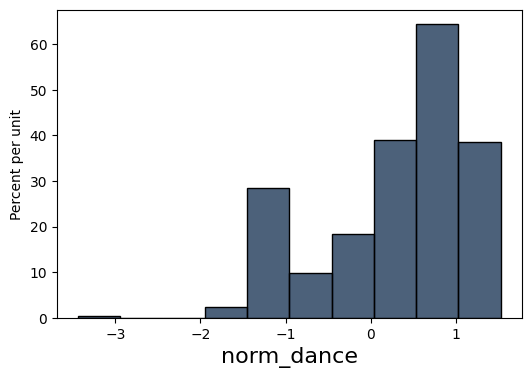

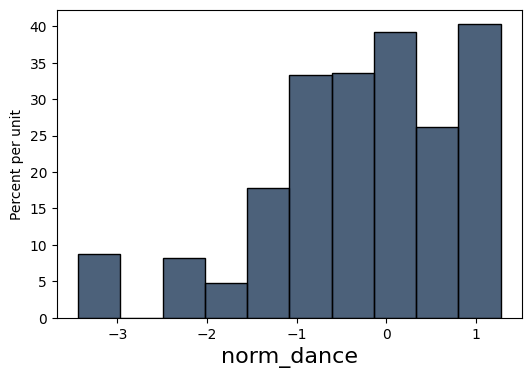

In [121]:
# Prints the histograms of each country
spotify_fr.hist('norm_dance')
spotify_us.hist('norm_dance')

## Bonus Question (b) - 2 Points

Now it is time to perform the actual t-test since all assumptions were met. To do this, we need to decide on a hypothesis we need to test. We will use the following hypoteses:

$H_0$: The mean danceability of songs popular in France is the same as the mean danceability of songs popular in America

$H_a$: The mean danceability of songs popular in France is higher than the mean danceability of songs popular in America

While the math behind a t-test is simple, it is beyond the scope of this class. (Here is a resource if you are interested: [Statology](https://www.statology.org/two-sample-t-test/)) Fill in the *None* values of the following code block with the correct value. The *a_value* and *b_value* should be columns of the two tables created in part a of the bonus question. *equal_variance* Should be a True/False boolean. (Note: Order matters for the *a_value* and *b_value*!)

In [ ]:
#TODO: Fill in the None values in this block!

import scipy.stats as stats

a_value = None  # This value should contain a column of a table
b_value = None  # This value should contain a column of a table
equal_variance = None   # This value should be True or False

# Performs the t-test and displays the results
t_test = stats.ttest_ind(a=a_value, b=b_value, equal_var=equal_variance)

print(f'The results of the t-test are: {t_test}')

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [94]:
import scipy.stats as stats

# Assigns the correct values to the variables (NOTE: Order matters for a and b values)
a_value = spotify_fr['norm_dance']
b_value = spotify_us['norm_dance']
equal_variance = True

# Performs the t-test and displays the results
t_test = stats.ttest_ind(a=a_value, b=b_value, equal_var=equal_variance)
print(f'The results of the t-test are: {t_test}')

The results of the t-test are: TtestResult(statistic=15.827670381970748, pvalue=4.3120559806621321e-54, df=2779.0)


## Bonus Question (c) - 2 Points

Now that we have completed the t-test, we can draw a conclusion about our hypotheses. Use the following format, replacing the values with the ones from the previous questions. (Hint: If we have a p-value less than 0.05, we can say there is **strong evidence** for the alternative hypothesis!)

Format: *There is (amount of evidence) that the true mean danceability of popular French songs is higher than the true mean danceability of popular American songs. (t=(test statistic), p-value=(p value), df=(degrees of freedom))*

**Answer -**

**Sample Answer-** There is strong evidence that the true mean danceability of popular French songs is higher than the true mean danceability of popular American songs. (t=15.827670381970748, p-value=4.3120559806621321 $e^{-54}$, df=2779)